In [1]:
import lxml.etree as ET
import glob
import csv
import os.path
import pandas
import regex as re
import unicodedata


def normalize(text: str) -> str:
    return unicodedata.normalize("NFKC", re.sub(r"\s{2,}|\n+", " ", text))

cnt = re.compile("\w+")

NS = {"namespaces": {"t": "http://www.tei-c.org/ns/1.0"}}

XSL = """<xsl:stylesheet xmlns:xsl="http://www.w3.org/1999/XSL/Transform"
    xmlns:xs="http://www.w3.org/2001/XMLSchema"
    xmlns:t="http://www.tei-c.org/ns/1.0"
    exclude-result-prefixes="xs"
    version="1.0">
    <xsl:output method="text"/>
    <xsl:template match="t:TEI">
        <xsl:apply-templates select="//t:body" />
    </xsl:template>
    <xsl:template match="t:body">
        <xsl:apply-templates/>
    </xsl:template>
    <xsl:template match="t:label"/>
</xsl:stylesheet>"""

XSL = ET.XSLT(ET.fromstring(XSL))

data = []

for file in glob.glob("./tei/*.xml"):
    xml = ET.parse(file)
    text = normalize(str(XSL(xml))).strip()
    data.append({
        "file": os.path.basename(file),
        "author": os.path.basename(file).split("-")[0],
        "title": os.path.basename(file).split("-")[1][:-4],
        "text": text,
        "tokens": len(cnt.findall(text))
    })

df = pandas.DataFrame(data)
df.to_csv("texts.csv", index=False)


<AxesSubplot:>

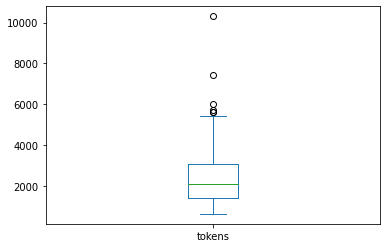

In [2]:
 df.tokens.plot.box()